## Task #2: Apply k-means Clustering and Find the Optimal Number of Clusters using Elbow Method

In [55]:
# k-means
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
# DBSCAN
from sklearn.cluster import DBSCAN
# k nearest neighburs 
from sklearn.neighbors import NearestNeighbors
# scaler
from sklearn.preprocessing import StandardScaler
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples
! pip install folium
import folium

! pip install nltk
import nltk


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\bernardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\bernardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 333.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     -------------------------- ----------- 41.0/57.7 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 4.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/274.1 kB ? eta -:--:--
   --------------------------------------- 274.1/274.1 kB 16.5 MB/s eta 0:00:00
   -----------

In [ ]:
import nltk
nltk.download('all')
# Install NLTK
! pip install nltk

# Import NLTK

# Download the necessary NLTK data
nltk.download('punkt')  # Tokenizer models
nltk.download('stopwords')  # Stopwords corpus

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\bernardo\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\bernardo\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\bernardo\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\bernardo\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\bernardo\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]  


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\bernardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bernardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bernardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_table("./data/cleaned-data.csv", sep=",")

In [5]:
# Scale the data
columns_to_drop = ['id', 'user', 'tags', 'title',  'date_taken_minute', 'date_taken_hour', 'date_taken_day', 'date_taken_month', 'date_taken_year', 'date_upload_minute', 'date_upload_hour', 'date_upload_day', 'date_upload_month', 'date_upload_year', 'Unnamed: 16',	'Unnamed: 17',	'Unnamed: 18']
df_clustering = data.drop(columns_to_drop , axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.46842127 -0.56311456]
 [-0.52422679  0.71829489]
 [-0.26470298  0.20909286]
 ...
 [-0.15920663 -0.11875508]
 [-0.15920663 -0.11875508]
 [-0.35164433 -0.2444322 ]]


,lat,long
0,-0.468421,-0.563115
1,-0.524227,0.718295
2,-0.264703,0.209093
3,0.555687,1.063759
4,0.555687,1.063759


In [29]:
# number of clusters 
k = 150
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=150)

In [30]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [103 131 134 ...  73  73  34]


In [31]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 1173.714444438873


**RESULTS**

* Add a column `cluster kmeans` to the `data_cleaned` DataFrame containing the labels of k-means clustering for `k=150`

In [32]:
# ANSWER
data['k-means labels'] = labels

display(data)

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,k-means labels
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN,103
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN,131
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN,134
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN,61
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187538,44402328654,90493526@N00,45.758316,4.825197,"europe,france,lyon,croixrousse,streetart,wheat...","Pasted paper by Big Ben [Lyon, France]",18.0,17,30,9,2018,11,23,5.0,10,2018.0,NaN,NaN,NaN,118
187539,44210748275,144146684@N04,45.762635,4.837299,NaN,white blood,36.0,16,5,10,2018,41,22,5.0,10,2018.0,NaN,NaN,NaN,3
187540,45122361361,95450872@N03,45.763657,4.836012,"auvergnerhônealpes,rhône,lyonnais,valléedurhôn...",Lyon - Porte Passage de l'Argue,48.0,19,27,9,2018,40,22,5.0,10,2018.0,NaN,NaN,NaN,73
187541,45073351222,95450872@N03,45.763657,4.836012,"auvergnerhônealpes,rhône,lyonnais,valléedurhôn...",Lyon - Passage de l'Argue,48.0,19,27,9,2018,29,22,5.0,10,2018.0,NaN,NaN,NaN,73


## Task #3: Cluster Evaluation using Silhouette Coefficient

In [41]:
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples

In [42]:
# Calculate silhouette scores
silhouette_avg = silhouette_score(scaled_data, labels, metric='euclidean')
sample_silhouette_values = silhouette_samples(scaled_data, labels, metric='euclidean')
scaled_data_df['silhouette kmeans'] = sample_silhouette_values

print(f"Average silhouette score: {silhouette_avg}")
print(f"Sample Silhouette values: {sample_silhouette_values}")

Average silhouette score: 0.5294805470162657
Sample Silhouette values: [0.47452932 0.41454391 0.14958642 ... 0.50354532 0.50354532 0.64602208]


In [43]:
# ANSWER
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

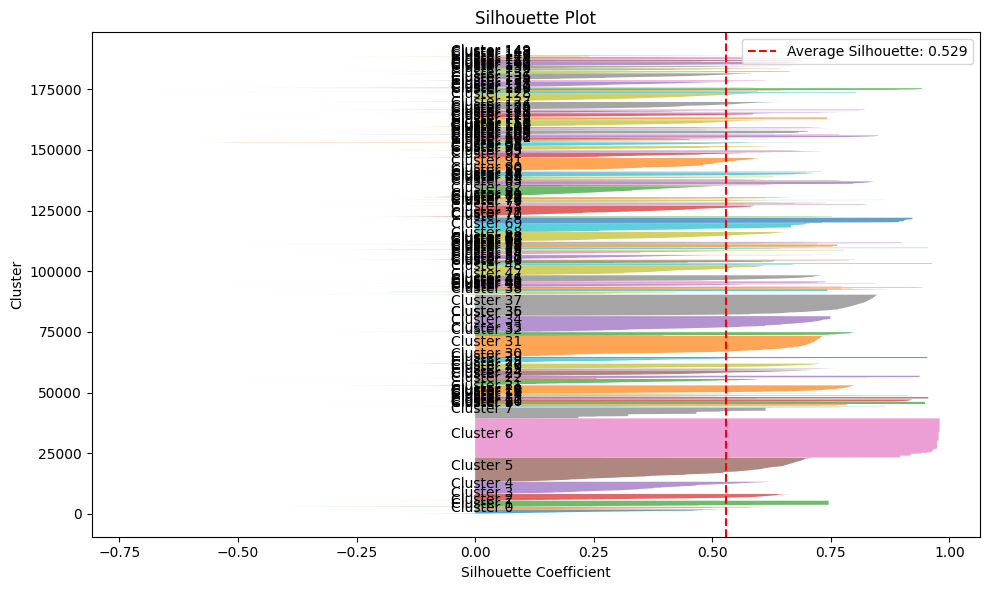

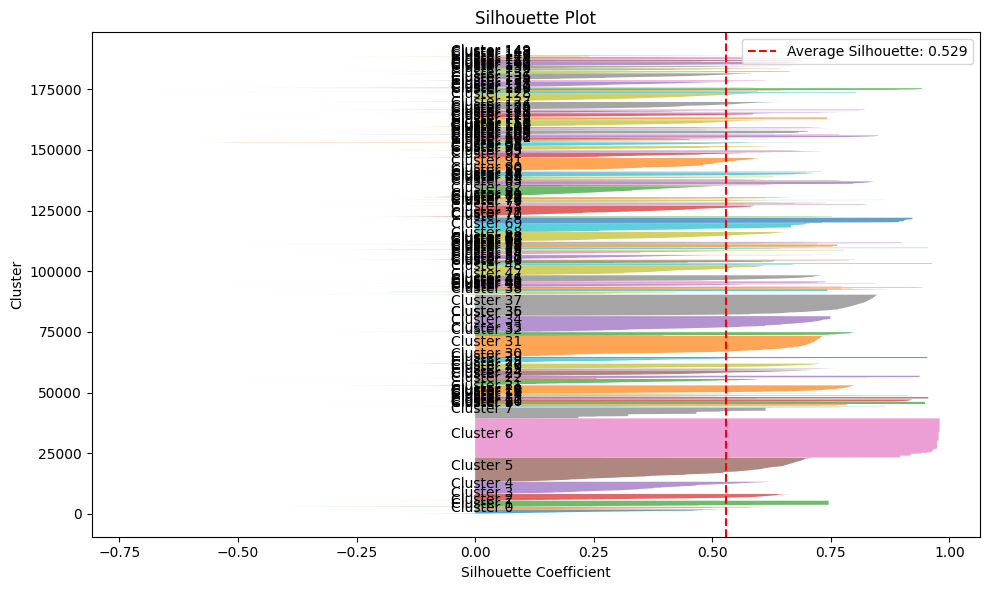

In [46]:
plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=150)

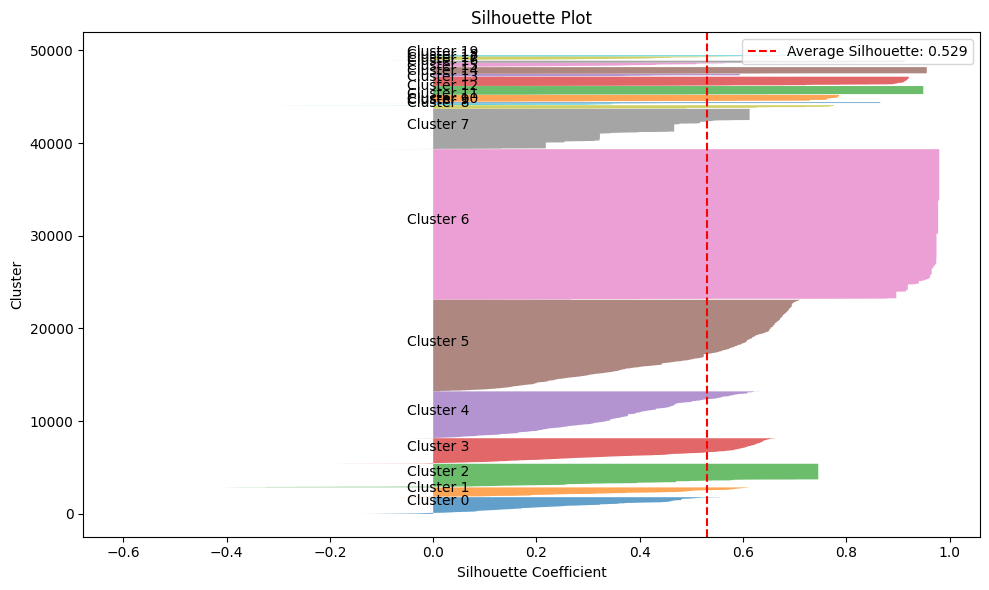

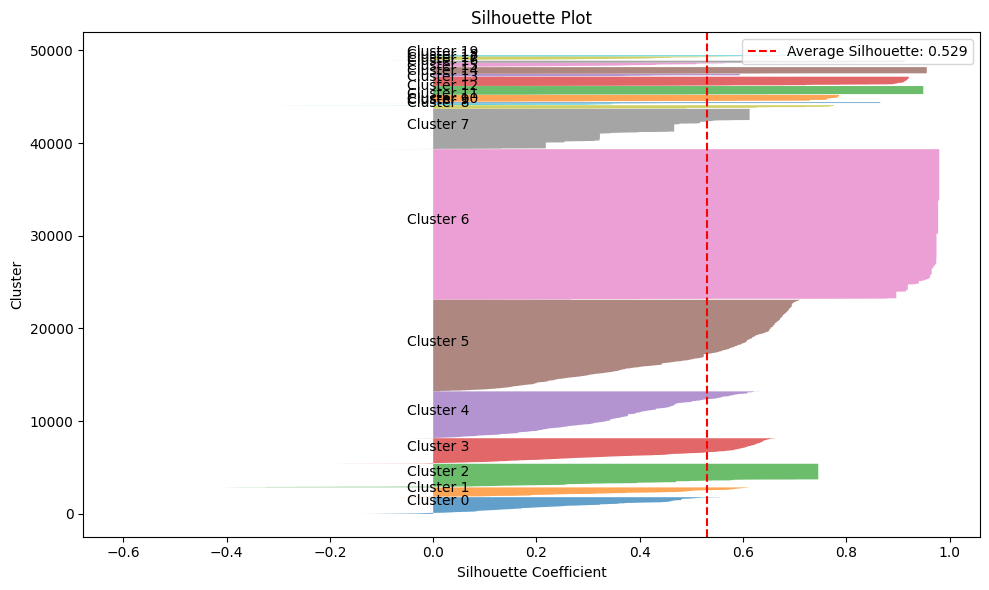

In [45]:
plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=20)

In [40]:
data

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,k-means labels
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN,103
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN,131
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN,134
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN,61
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187538,44402328654,90493526@N00,45.758316,4.825197,"europe,france,lyon,croixrousse,streetart,wheat...","Pasted paper by Big Ben [Lyon, France]",18.0,17,30,9,2018,11,23,5.0,10,2018.0,NaN,NaN,NaN,118
187539,44210748275,144146684@N04,45.762635,4.837299,NaN,white blood,36.0,16,5,10,2018,41,22,5.0,10,2018.0,NaN,NaN,NaN,3
187540,45122361361,95450872@N03,45.763657,4.836012,"auvergnerhônealpes,rhône,lyonnais,valléedurhôn...",Lyon - Porte Passage de l'Argue,48.0,19,27,9,2018,40,22,5.0,10,2018.0,NaN,NaN,NaN,73
187541,45073351222,95450872@N03,45.763657,4.836012,"auvergnerhônealpes,rhône,lyonnais,valléedurhôn...",Lyon - Passage de l'Argue,48.0,19,27,9,2018,29,22,5.0,10,2018.0,NaN,NaN,NaN,73


In [53]:
#Plotting with kmeans
data.groupby('k-means labels')[['lat', 'long']].mean()
# Create a folium map centered around the mean latitude and longitude of the clusters
map_clusters = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each cluster center
for cluster_label, cluster_center in data.groupby('k-means labels')[['lat', 'long']].mean().iterrows():
    folium.Marker(
        location=[cluster_center['lat'], cluster_center['long']],
        popup=f'Cluster {cluster_label}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_clusters)

map_clusters

In [38]:
#Plotting with dbscan filtered cluster center
map_clusters
# Randomly sample 1500 objects from filtered_data_dsbcan
sampled_data = data.sample(n=1500)

# Create a folium map centered around the mean latitude and longitude of the sampled data
map_sampled_clusters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each sampled data point
# Define a color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each sampled data point with different colors for different clusters
for _, row in sampled_data[sampled_data['k-means labels'] != -1].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Cluster {row["k-means labels"]}',
        icon=folium.Icon(color=colors[row["k-means labels"] % len(colors)], icon='info-sign')
    ).add_to(map_sampled_clusters)

map_sampled_clusters

## Task #5: Data mining

In [68]:
from collections import Counter
import re

dataset_cluster = {}

dataset = data[~data['title'].isna()][['title', 'k-means labels']]

for cluster in dataset['k-means labels'].unique():
    dataset_cluster[cluster] = dataset[dataset['k-means labels'] == cluster]

    dataset_cluster_tokens = [nltk.word_tokenize(title, 'french') for title in dataset_cluster[cluster]['title']]

    # Remove stop words in french
    stop_words = set(nltk.corpus.stopwords.words('french'))
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in stop_words] for tokens in dataset_cluster_tokens]

    # Remove stopwords in english
    stop_words = set(nltk.corpus.stopwords.words('english'))
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in stop_words] for tokens in dataset_cluster_tokens]

    # Remove symbols like '#' and '()'
    dataset_cluster_tokens = [[re.sub(r'[^\w\s]', '', token) for token in tokens] for tokens in dataset_cluster_tokens]

    # Remove empty tokens
    dataset_cluster_tokens = [[token for token in tokens if token] for tokens in dataset_cluster_tokens]

    # Remove the word 'lyon' and 'france'
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in ['lyon', 'france']] for tokens in dataset_cluster_tokens]

    # Remove numbers
    dataset_cluster_tokens = [[token for token in tokens if not token.isnumeric()] for tokens in dataset_cluster_tokens]

    # Flatten the list of tokenized titles
    all_tokens = [token for sublist in dataset_cluster_tokens for token in sublist]

    # Count the frequency of each word
    word_freq = Counter(all_tokens)

    # write the most common words in a dictionary
    dataset_cluster[cluster] = word_freq.most_common(1)

dataset_cluster


{103: [('Anniversaire', 56)],
 134: [('Tour', 244)],
 61: [('Karna', 79)],
 31: [('BeauxArts', 679)],
 6: [('Chaos', 8268)],
 123: [('Rhône', 118)],
 118: [('SaintGeorges', 133)],
 28: [('Rhône', 131)],
 133: [('Berliet', 18)],
 99: [('paper', 165)],
 138: [('paper', 52)],
 34: [('Bellecour', 761)],
 83: [('Bass', 39)],
 137: [('Lione', 233)],
 102: [('DoctorWhoClassic', 109)],
 125: [('Canuts', 46)],
 68: [('Vieux', 206)],
 29: [('Rhône', 134)],
 89: [('Parc', 210)],
 140: [('M16', 9)],
 69: [('SIdO', 485)],
 3: [('République', 199)],
 76: [('RochetailléesurSaône', 156)],
 91: [('saxotaz', 493)],
 82: [('Saône', 346)],
 47: [('Fourvière', 264)],
 73: [('Fête', 209)],
 22: [('dAinay', 323)],
 98: [('Open', 148)],
 48: [('Parc', 832)],
 0: [('Parc', 482)],
 81: [('Brotteaux', 75)],
 79: [('Mont', 17)],
 85: [('Forum', 161)],
 104: [('Lumière', 194)],
 122: [('saintdidieraumontdor', 11)],
 127: [('Jacobins', 351)],
 56: [('paper', 201)],
 78: [('Ascie', 59)],
 128: [('paper', 336)],
 142

In [69]:
# Create a new column in the data DataFrame to store the most common words for each cluster
data['common_words'] = data['k-means labels'].map(lambda x: dataset_cluster.get(x, []))

# Display the updated DataFrame
display(data)

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,k-means labels,common_words
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,...,23,20,28.0,2,2010.0,NaN,NaN,NaN,103,"[(Anniversaire, 56)]"
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,...,52,17,28.0,2,2010.0,NaN,NaN,NaN,131,"[(vs, 46)]"
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,...,33,17,28.0,2,2010.0,NaN,NaN,NaN,134,"[(Tour, 244)]"
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,...,38,12,28.0,2,2010.0,NaN,NaN,NaN,61,"[(Karna, 79)]"
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,...,38,12,28.0,2,2010.0,NaN,NaN,NaN,61,"[(Karna, 79)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187538,44402328654,90493526@N00,45.758316,4.825197,"europe,france,lyon,croixrousse,streetart,wheat...","Pasted paper by Big Ben [Lyon, France]",18.0,17,30,9,...,11,23,5.0,10,2018.0,NaN,NaN,NaN,118,"[(SaintGeorges, 133)]"
187539,44210748275,144146684@N04,45.762635,4.837299,NaN,white blood,36.0,16,5,10,...,41,22,5.0,10,2018.0,NaN,NaN,NaN,3,"[(République, 199)]"
187540,45122361361,95450872@N03,45.763657,4.836012,"auvergnerhônealpes,rhône,lyonnais,valléedurhôn...",Lyon - Porte Passage de l'Argue,48.0,19,27,9,...,40,22,5.0,10,2018.0,NaN,NaN,NaN,73,"[(Fête, 209)]"
187541,45073351222,95450872@N03,45.763657,4.836012,"auvergnerhônealpes,rhône,lyonnais,valléedurhôn...",Lyon - Passage de l'Argue,48.0,19,27,9,...,29,22,5.0,10,2018.0,NaN,NaN,NaN,73,"[(Fête, 209)]"


In [71]:
#Plotting with kmeans
data.groupby('k-means labels')[['lat', 'long']].mean()
# Create a folium map centered around the mean latitude and longitude of the clusters
map_clusters = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each cluster center
for cluster_label, cluster_center in data.groupby('k-means labels')[['lat', 'long']].mean().iterrows():
    cluster_name = data[data['k-means labels'] == cluster_label]['cluster_name'].iloc[0]
    folium.Marker(
        location=[cluster_center['lat'], cluster_center['long']],
        popup=f'Cluster {cluster_label}: {cluster_name}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_clusters)

map_clusters